In [60]:
# 문장간에 유사한 문장 찾기

In [61]:
# 1단계: 필요한 데이터 다운로드
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

# 2단계: 데이터 탐색
from nltk.corpus import movie_reviews

# 데이터셋 크기 파악
print(f"전체 영화 리뷰 수: {len(movie_reviews.fileids())}")
print(f"카테고리: {movie_reviews.categories()}")  # ['neg', 'pos']
print(f"부정 리뷰: {len(movie_reviews.fileids(categories='neg'))}개")
print(f"긍정 리뷰: {len(movie_reviews.fileids(categories='pos'))}개")

# 3단계: 첫 번째 리뷰 살펴보기
first_review_id = movie_reviews.fileids()[0]
first_review = movie_reviews.raw(first_review_id)
print(f"\n첫 번째 리뷰 ID: {first_review_id}")
print(f"원문 일부:\n{first_review[:200]}")

# 4단계: 토큰화 결과 확인
sentences = movie_reviews.sents(first_review_id)  # 문장 단위 토큰화
words = movie_reviews.words(first_review_id)      # 단어 단위 토큰화

print(f"\n문장 토큰화 (첫 2개):")
for i, sent in enumerate(sentences[:2]):
    print(f"  {i+1}: {sent}")

print(f"\n단어 토큰화 (첫 20개): {words[:20]}")

전체 영화 리뷰 수: 2000
카테고리: ['neg', 'pos']
부정 리뷰: 1000개
긍정 리뷰: 1000개

첫 번째 리뷰 ID: neg/cv000_29416.txt
원문 일부:
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w

문장 토큰화 (첫 2개):
  1: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.']
  2: ['they', 'get', 'into', 'an', 'accident', '.']

단어 토큰화 (첫 20개): ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
# RegressTokenizer : 정규표현식으로 정확한 토큰화
# stowords : 문법적 기능을 제거하고 단어에 집중
# 상위 N개 단어 선택 : 메모리 효율성과 노이즈 제거의 균형

In [63]:
# BOW - 수동으로 벡터 생성
# 1단계: 모든 문서를 단어 리스트로 변환
documents = [list(movie_reviews.words(fileid)) 
             for fileid in movie_reviews.fileids()]

print(f"전체 문서 수: {len(documents)}")
print(f"첫 문서의 단어 수: {len(documents[0])}")
print(f"첫 문서의 첫 50개 단어:\n{documents[0][:50]}")

# 2단계: 전체 단어 빈도 계산 (불용어 제외 전)
word_count = {}
for doc in documents:
    for word in doc:
        word_count[word] = word_count.get(word, 0) + 1

# 상위 10개 빈도 단어 확인
sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print("\n상위 10개 빈도 단어:")
for i, (word, count) in enumerate(sorted_words[:10], 1):
    print(f"  {i}. '{word}': {count}회")

# 3단계: 불용어 제거 후 처리
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# 정규표현식으로 3글자 이상의 단어만 추출
tokenizer = RegexpTokenizer(r"[\w']{3,}")
# 영어 불용어 로드
english_stops = set(stopwords.words('english'))

# 모든 리뷰를 토큰화하고 불용어 제거
processed_documents = []
for fileid in movie_reviews.fileids():
    raw_text = movie_reviews.raw(fileid)
    tokens = [token for token in tokenizer.tokenize(raw_text) 
              if token not in english_stops]
    processed_documents.append(tokens)

# 처리 후 단어 빈도 재계산
word_count_processed = {}
for doc in processed_documents:
    for word in doc:
        word_count_processed[word] = word_count_processed.get(word, 0) + 1

sorted_processed = sorted(word_count_processed.items(), 
                         key=lambda x: x[1], reverse=True)

print(f"\n전체 서로 다른 단어 수: {len(sorted_processed)}")
print("\n처리 후 상위 10개 단어:")
for i, (word, count) in enumerate(sorted_processed[:10], 1):
    print(f"  {i}. '{word}': {count}회")

# 4단계: 특성 선택 (상위 1000개 단어)
word_features = [word for word, count in sorted_processed[:1000]]
print(f"\n특성으로 선택된 단어 수: {len(word_features)}")
print(f"특성 예시: {word_features[:20]}")

전체 문서 수: 2000
첫 문서의 단어 수: 879
첫 문서의 첫 50개 단어:
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']

상위 10개 빈도 단어:
  1. ',': 77717회
  2. 'the': 76529회
  3. '.': 65876회
  4. 'a': 38106회
  5. 'and': 35576회
  6. 'of': 34123회
  7. 'to': 31937회
  8. ''': 30585회
  9. 'is': 25195회
  10. 'in': 21822회

전체 서로 다른 단어 수: 43011

처리 후 상위 10개 단어:
  1. 'film': 8935회
  2. 'one': 5791회
  3. 'movie': 5538회
  4. 'like': 3690회
  5. 'even': 2564회
  6. 'time': 2409회
  7. 'good': 2407회
  8. 'story': 2136회
  9. 'would': 2084회
  10. 'much': 2049회

특성으로 선택된 단어 수: 1000
특성 예시: ['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story', 'would', 'much', 'also', 'get', 'character', 'two', 'well', '

In [64]:
def document_features(document, word_features):
    """
    문서를 특성 벡터로 변환
    
    Args:
        document: 토큰화된 단어 리스트
        word_features: 특성으로 사용할 단어 리스트
    
    Returns:
        document의 각 특성에 대한 빈도 리스트
    """
    # 문서 내 단어 빈도 계산
    word_count = {}
    for word in document:
        word_count[word] = word_count.get(word, 0) + 1
    
    # 특성 벡터 생성
    features = []
    for word in word_features:
        # 특성 단어가 문서에 없으면 0
        features.append(word_count.get(word, 0))
    
    return features

# 테스트 실행
test_features = ['one', 'two', 'teen', 'couples', 'solo']
test_doc = ['two', 'two', 'couples']
result = document_features(test_doc, test_features)

print("테스트 단어 리스트:", test_features)
print("테스트 문서:", test_doc)
print("결과 벡터:", result)
print("→ 'two'가 2번, 'couples'가 1번, 나머지는 0")

# 모든 문서에 대해 특성 벡터 생성
feature_sets = [document_features(doc, word_features) 
                 for doc in processed_documents]

print(f"\n생성된 특성 벡터 수: {len(feature_sets)}")
print(f"각 벡터의 차원: {len(feature_sets[0])}")
print(f"\n첫 문서 벡터 (처음 20개):")
for i, (word, count) in enumerate(zip(word_features[:20], feature_sets[0][:20])):
    print(f"  '{word}': {count}")

테스트 단어 리스트: ['one', 'two', 'teen', 'couples', 'solo']
테스트 문서: ['two', 'two', 'couples']
결과 벡터: [0, 2, 0, 1, 0]
→ 'two'가 2번, 'couples'가 1번, 나머지는 0

생성된 특성 벡터 수: 2000
각 벡터의 차원: 1000

첫 문서 벡터 (처음 20개):
  'film': 5
  'one': 3
  'movie': 6
  'like': 3
  'even': 3
  'time': 0
  'good': 2
  'story': 0
  'would': 1
  'much': 0
  'also': 1
  'get': 3
  'character': 1
  'two': 2
  'well': 1
  'first': 0
  'characters': 1
  'see': 2
  'way': 3
  'make': 5


In [65]:
# CountVectorizer가 위절차를 수행한다.
# CountVectorizer 사용방법

In [66]:
# processed_documents[0][:5] # 문장을 토큰화(3개의 연속된 문장, 불용어 제거)
for doc in processed_documents:
    english_stops

In [67]:
# 각 문서의 고정된 길이의 벡터로 변환(모든 문서가 같은 차원)
# 기계학습 알고리즘의 입력형식으로 변환
def document_features(document, word_features):
    """
    
    """

###

In [68]:
import pandas as pd
url = "C:\\Users\\Playdata2\\Downloads\\daum_movie_review.csv"
df = pd.read_csv(url)

In [69]:
sample_review = df.review[1]
sample_review

'몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.'

In [70]:
from konlpy.tag import Okt
okt = Okt()

In [71]:
# 명사만 추출
okt.nouns(sample_review)

['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']

In [72]:
okt.pos(sample_review)

[('몰입', 'Noun'),
 ('할수밖에', 'Verb'),
 ('없다', 'Adjective'),
 ('.', 'Punctuation'),
 ('어렵게', 'Adjective'),
 ('생각', 'Noun'),
 ('할', 'Verb'),
 ('필요없다', 'Adjective'),
 ('.', 'Punctuation'),
 ('내', 'Noun'),
 ('가', 'Josa'),
 ('전투', 'Noun'),
 ('에', 'Josa'),
 ('참여', 'Noun'),
 ('한', 'Determiner'),
 ('듯', 'Noun'),
 ('손', 'Noun'),
 ('에', 'Josa'),
 ('땀', 'Noun'),
 ('이남', 'Noun'),
 ('.', 'Punctuation')]

In [73]:
# 명사 동사 형용사 Noun Verb Adjective
[word for word, tag in okt.pos(sample_review) if tag in ['Noun','Verb','Adjective']]

['몰입',
 '할수밖에',
 '없다',
 '어렵게',
 '생각',
 '할',
 '필요없다',
 '내',
 '전투',
 '참여',
 '듯',
 '손',
 '땀',
 '이남']

In [74]:
# 커스텀 토크나이저 함수로 생성
def custom_tokenizer(doc):
    return [word for word, tag in okt.pos(doc) if tag in ['Noun','Verb','Adjective']]
# 커스텀 토크나이저 함수를 만든 이유
# CountVectorizer에 커스텀 토크나이저 적용하기위해서, 그니깐 간략하게 적을려고

In [75]:
# CountVectorizer에 커스텀 토크나이저 적용
from sklearn.feature_extraction.text import CountVectorizer
daum_cv = CountVectorizer(max_features=1000, tokenizer=custom_tokenizer)
daum_dtm = daum_cv.fit_transform(df.review)
daum_dtm.shape

c:\Users\Playdata2\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(14725, 1000)

In [76]:
# 코사인 유사도 -1 ~ 1 사이의 값을 벡터간 각도기반 유사도 계산
# 0 에 가까운 값 : 직교(무관) 1에 가까우면 같은 방향
# 모든 유사도를 계산 : 상위 N개 결과 도출(추천 시스템의 기초) - 유튜브 알고리즘과 연관?

In [77]:
from sklearn.metrics.pairwise import cosine_similarity
reviews = df.review.copy()
original_review = reviews[1]
words = original_review.split()

# 뒤 절반을 query 사용
midpoint = len(words) // 2
query_text = " ".join(words[midpoint:])
# 벡터로 변환
query_vector = daum_cv.transform([query_text])
query_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 1000)>

In [78]:
reviews[1]

'몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.'

In [79]:
# 모든 리뷰와 유사도 계산
# 첫번째 중간에서부터 뒷부분까지와 전체 데이터의 유사도를 비교하였다.
import numpy as np
similarity_scores = cosine_similarity(query_vector,daum_dtm)
most_similar_idx = np.argmax(similarity_scores)

# 가장 높은 유사도 값
highest_score = similarity_scores[0, most_similar_idx]

# 퍼센트로 변환
similarity_percent = highest_score * 100

print(f"가장 유사한 리뷰 인덱스: {most_similar_idx}")
print(f"유사도: {similarity_percent:.2f}%")
# 가장 유사한 리뷰  인덱스 가 첫번째 문장, 첫번째 문장 이 가장유사하다고 뜬....
# 본인을 제외한 그 이외의 상위 5개의 문장을 조회해보고자한다

가장 유사한 리뷰 인덱스: 1
유사도: 65.47%


In [80]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# query_vector: 쿼리 텍스트 벡터
# daum_dtm: 전체 리뷰 DTM
# daum_reviews: 전체 리뷰 리스트 또는 시리즈

# 1. 모든 리뷰와 유사도 계산
similarity_scores = cosine_similarity(query_vector, daum_dtm)[0]  # 1차원 배열

# 2. 자기 자신(가장 높은 유사도) 제외
most_similar_idx = np.argmax(similarity_scores)
similarity_scores[most_similar_idx] = 0

# 3. 상위 5개의 인덱스 추출
top5_idx = np.argsort(similarity_scores)[-5:][::-1]  # 내림차순
top5_scores = similarity_scores[top5_idx] * 100  # 퍼센트로 변환

# 4. 출력
print("원래 쿼리 텍스트:")
print(query_text)
print("\n본인을 제외한 상위 5개의 유사한 리뷰:")

for idx, score in zip(top5_idx, top5_scores):
    print(f"\n리뷰 인덱스: {idx}, 유사도: {score:.2f}%")
    print(reviews[idx])

원래 쿼리 텍스트:
내가 전투에 참여한듯 손에 땀이남.

본인을 제외한 상위 5개의 유사한 리뷰:

리뷰 인덱스: 11, 유사도: 57.74%
내가졸라이상하네

리뷰 인덱스: 13318, 유사도: 57.74%
탈출인 듯

리뷰 인덱스: 2523, 유사도: 57.74%
익숙한 듯 아련한.

리뷰 인덱스: 5840, 유사도: 57.74%
개취인듯 ㅠ

리뷰 인덱스: 3866, 유사도: 57.74%
옛날 플래쉬 게임 부기맨과 아웃라스트 휠체어 합쳐 놓은 듯 쩝...........


In [90]:
from konlpy.tag import Okt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
url = "https://drive.google.com/uc?id=1KOKgZ4qCg49bgj1QNTwk1Vd29soeB27o"
df = pd.read_csv(url)
okt = Okt()
def custom_tokenizer(doc):
    """
    형태소 분석 후 명사, 동사, 형용사만 추출
    """
    pos_tags = okt.pos(doc)
    tokens = [word for word, pos in pos_tags 
              if pos in ['Noun', 'Verb', 'Adjective']]
    return tokens

daum_cv = CountVectorizer(
    max_features=1000,
    tokenizer=custom_tokenizer
)

reviews = df.review
daum_dtm  = daum_cv.fit_transform(reviews)
original_review = reviews[0]  # 첫 번째 리뷰
print(f"원본 리뷰 (처음 200자):\n{original_review[:200]}\n")

# 문서의 뒤 절반을 query로 사용 (부분 검색 시나리오)
midpoint = len(original_review) // 2
# query_text = original_review[midpoint:]  # 뒤 절반
query_text = original_review
print(f"쿼리 텍스트 (처음 150자):\n{query_text[:150]}\n")

# 2단계: 쿼리 문서를 벡터로 변환
query_vector = daum_cv.transform([query_text])
print(f"쿼리 벡터 크기: {query_vector.shape}")

# 유사도 분석
scores = cosine_similarity(query_vector,daum_dtm)
most_simular_idx = np.argmax(scores)
# scores[most_simular_idx], reviews[most_simular_idx]

c:\Users\Playdata2\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


원본 리뷰 (처음 200자):
돈 들인건 티가 나지만 보는 내내 하품만

쿼리 텍스트 (처음 150자):
돈 들인건 티가 나지만 보는 내내 하품만

쿼리 벡터 크기: (1, 1000)


In [91]:
query_text

'돈 들인건 티가 나지만 보는 내내 하품만'

In [92]:
np.array(reviews)[scores[0].argsort()[::-1][:5]]

array(['돈 들인건 티가 나지만 보는 내내 하품만', '여전한 군바리 국가지배...보는 내내 슬펐다.',
       '보는 내내 설레였다', '보는 내내 눈시울이 ㅠㅠ', '보는 내내 너무 괴로웠다'], dtype=object)

In [81]:
# 개선 TF-IDF
# 단어의 상대적 중요도를 반영한 벡터화 기법
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
# TF : 특정단어가 문서에서 얼마나 자주나타나는 지 비율 (빈도)
# 해당 단어의 빈도 / 문서의 전체 단어 수 좋다 문서에서 10 번 해당 문서는 100단어 10 / 100
# IDF (Inverse Document Frequency) 단어가 전체 문장에서 얼마나 드문지 (희귀)
# log(전체 문서 / 해당 단어 포함 문서) 단어의 가중치를 낮추기 위해서 log적용
# 2000개 문서중 100개만 '좋다' log(2000/100) = 2.99
# TF-IDF TF x IDF --> 특정 문서에서 의미 있는 단어에 높은 가중치를 부여한다.

# 이 값이 클수록 문서내에서 단어 중요도가 높다 라고 판단하는 지표

In [82]:
tfidf_cv = TfidfVectorizer( # 사용법은 CounterVectorizer와 유사
    max_features=1000,
    tokenizer=custom_tokenizer
)
tfidf_dtm = tfidf_cv.fit_transform(reviews) # 전체 문서를 TF-IDF 벡터화

count_dtm = daum_cv.fit_transform(reviews) # 전체 문서를 Bow 벡터화
count_dtm.shape, tfidf_dtm.shape

((14725, 1000), (14725, 1000))

In [83]:
# 쿼리 벡터화
query_count = daum_cv.transform([query_text])
query_tfidf = tfidf_cv.transform([query_text])

# 코사인 유사도 계산
count_sim = cosine_similarity(query_count,count_dtm)[0]
tfidf_sim = cosine_similarity(query_tfidf,tfidf_dtm)[0]

In [84]:
a=np.array([1,2,3,4,5])
a.argsort() # 오름차순으로 인덱스
(-a).argsort() # 값에 -를 붙이면 .. 오름차순 인덱스는 내림차순과 같다

array([4, 3, 2, 1, 0])

In [ ]:
# '돈 들인건 티가 나지만 보는 내내 하품만'

In [ ]:
# CountVectorizer	| TF-IDF
# 단어 출현 횟수	 | 단어 출현 × 희귀 단어 가중치

In [85]:
top5_count_index = (-count_sim).argsort()[:5]
top5_tfidf_index = (-tfidf_sim).argsort()[:5]

In [86]:

reviews = np.array(reviews)

In [87]:
reviews[top5_count_index][1:]

array(['탈출인 듯', '개취인듯...', '개취인듯 ㅠ',
       '옛날 플래쉬 게임 부기맨과 아웃라스트 휠체어 합쳐 놓은 듯 쩝...........'], dtype=object)

In [ ]:
# 짧은 문장일수록 벡터의 크기가 작아,
# Cosine similarity 계산에서 “작게나마 비슷하다”고 판단될 가능성이 있음

In [88]:
reviews[top5_tfidf_index][1:]

array(['정말 손에 땀을쥐고 보았네요~~',
       '진짜 무서웠음..ㄷㄷ 얘들이랑 보는데 내 옆에 친구는 무서워서 내 손 잡고 힘을 엄청 쥐는데..손에 피가 안통했음..',
       '손수건 필히지참하세요 안그러면  손으로닦아야  합니다', '이 영화.. 흥행 100만 이상에 내 손모가지 건다.'],
      dtype=object)

In [ ]:
# 실제 의미 유사성”과 상관없이 벡터 차원에서 겹치는 단어가 있거나,
# 희귀 단어 가중치 때문에 선택

In [89]:

my_reivew = '숙면을 하기 좋은 영화.. 강추..'
# my_review  count 방식이나 또는 tf-idf 방식으로 벡터화 한후... 전체리뷰를 만약 tf-idf 방식이면 전체 리뷰를 tf-idf 벡터화 한
# 전체데이터와 함께 유사도 방식으로 점수를 구해서 상위 N개의 문서를 출력

In [98]:
# 쿼리 벡터화
query_count = daum_cv.transform([my_reivew])
query_tfidf = tfidf_cv.transform([my_reivew ])

# 코사인 유사도 계산
count_sim = cosine_similarity(query_count,count_dtm)[0]
tfidf_sim = cosine_similarity(query_tfidf,tfidf_dtm)[0]

top5_count_index = (-count_sim).argsort()[:5]
top5_tfidf_index = (-tfidf_sim).argsort()[:5]


In [ ]:
# my_reivew = '숙면을 하기 좋은 영화.. 강추..'

In [96]:

reviews[top5_count_index]

12788       강추 영화네요^^
5065       너무 좋은 영화네요
3466     아이디어만 좋은 영화.
14012            좋은영화
2252           좋은 영화.
Name: review, dtype: object

In [97]:

reviews[top5_tfidf_index]

2070     레이버 인포매틱스 공부하기 싫다
12788            강추 영화네요^^
11069                   강추
4553                  강추!!
8548                   강추!
Name: review, dtype: object

In [ ]:
# N-gram 연속된 N개의 단위
# unigram 1-gram
# 영화가 정말 재미있다
# [영화] [가] [정말] [재미있다]

# Bigram(2-gram)
# [영화 가] [가 정말] [정말 재미있다]
# 첫번째 단어와 마지막 단어는 한번씩 들어가겠네

# Trigram(3-gram)
# [영화 가 정말] [가 정말 재미있다]

# 특성
# 문맥정보 포함 : 단서의 순서와 관계를 반영
# 더 나은 분류 : 좋은 영화 나쁜 영화 구분
# 의미 보존 : 인접한 단어들의 의존성 보존


In [99]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

In [100]:
df.head()

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


<Axes: >

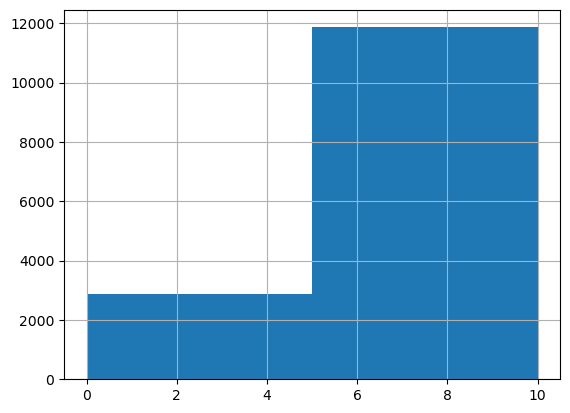

In [ ]:
df.rating.hist(bins=2) # 클래스 불균형 이 있어서 qcut을 사용

In [118]:
# df['rating_group'] = pd.qcut(df['rating'], q=2, labels=[0, 1])

# # 히스토그램
# plt.hist(df['rating_group'], bins=2, edgecolor='black')
# plt.xticks([0, 1])
# plt.xlabel('Rating Group')
# plt.ylabel('Count')
# plt.show()
df.drop('rating_group', axis=1, inplace=True)

In [119]:
df['label'] = (df.rating >= 7).astype(int)
df.tail(2)

,review,rating,date,title,label
14723,간만에 제대로 잘짜여진 각본의 영화를 봤네 여운이 아직도 남아~어른을 위한 애니~,10,2018.01.12,코코,1
14724,한국개봉을 눈빠지게 기다린 보람이있다 깨우치는게 많은 영화,10,2018.01.12,코코,1


In [ ]:
# 벡터화 n-gram별 벡터화 및 특성 비교
def tokenizer_morphs(text):
    '''
    형태소 기반 토크나이저
    '''
    return okt.morphs(text)

# 1-gram
TfidfTransformer(tokenizer=tokenizer_morphs, )